# Assignment 3 

#### Aandishah Samara 
#### September 27th, 2022

#### 1. Creating and Manipulating Arrays

In [ ]:
# Setting up Environment and loading Packages
import numpy as np
from matplotlib import pyplot as plt

### 1.1. Create two 2D arrays representing coordinates x, y on the cartesian plan
Both should cover the range (-2, 2) and have 100 points in each direction

In [ ]:
x = np.linspace(-2, 2, 100) # x dimension
y = np.linspace(-2, 2, 100) # y dimension
xx, yy = np.meshgrid(x, y) # create two 2D arrays

### 1.2. Visualize each 2D array using pcolormesh
Use the correct coordinates for the x and y axes.

In [ ]:
# Plotting xx 
fig1 = plt.figure(1, figsize = (10, 10))
plt.pcolormesh(x, y, xx)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Array XX")

In [ ]:
# Plotting yy 
fig2 = plt.figure(2, figsize = (10, 10))
plt.pcolormesh(x, y, yy)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Array YY")

### 1.3 From your cartesian coordinates, create polar coordinates r and φ
Refer to the wikipedia page for the conversion formula. You will need to use numpy’s arctan2 function. Read its documentation.

In [ ]:
#Creating Polar Coordinate r
r = np.hypot(x, y)
r.shape

In [ ]:
#Creating Polar Coordinate phi
phi = np.arctan2(y, x)
phi

In [ ]:
# Creating Grid 
rr, phiphi = np.meshgrid(r, phi)
rr.shape

### 1.4. Visualize r and φ on the 2D x / y plane using pcolormesh

In [ ]:
# Plot Figure
fig3 = plt.figure(3, figsize = (10, 10))
plt.pcolormesh(r, phi, rr)
plt.xlabel("r")
plt.ylabel("phi")
plt.title("Plot RR")

In [ ]:
# Plot Figure
fig4 = plt.figure(4, figsize = (10, 10))
plt.pcolormesh(r, phi, phiphi)
plt.xlabel("r")
plt.ylabel("phi")
plt.title("Plot Phi Phi")

### 1.5 Caclulate the quanity f=cos2(4r)+sin2(4φ)
And plot it on the x/y plane

In [ ]:
# Calculating function f 
f =  (((np.cos(4 * rr))**2) + (np.sin(4 * phiphi)**2))
f.shape

/tmp/ipykernel_1589/992006417.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(r, phi, f)


Text(0.5, 1.0, 'Plot F')

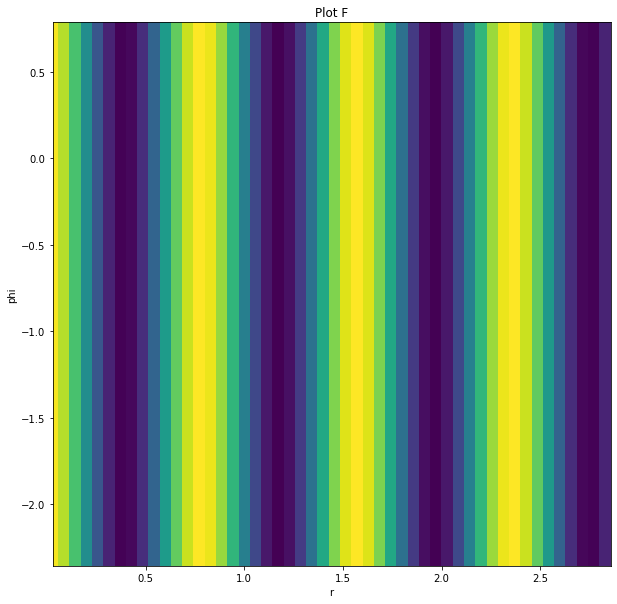

In [112]:
#Plotting f on x and y 
fig5 = plt.figure(5, figsize = (10, 10))
plt.pcolormesh(r, phi, f)
plt.xlabel("r")
plt.ylabel("phi")
plt.title("Plot F")

### 1.6 Plot the mean of f with respect to the x axis as a function of y

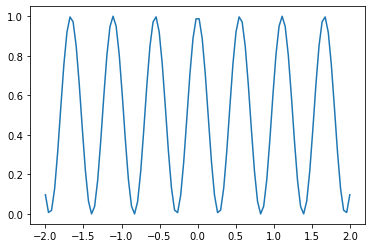

In [119]:
f_ymean = f.mean(axis=0)
plt.plot(x, f_ymean)
plt.title("Mean of y = f(x)")

### 1.7 Plot the mean of f with respect to the y axis as a function of x

Text(0.5, 1.0, 'Mean of x = f(y)')

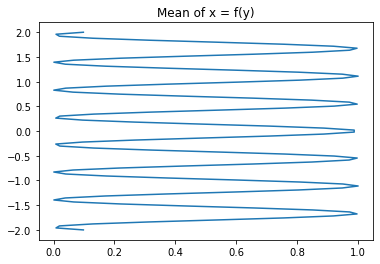

In [123]:
f_xmean = f.mean(axis=0)
plt.plot(f_xmean, y)
plt.title("Mean of x = f(y)")

### 1.8 Plot the mean of f with respect to ϕ as a function of r¶
This is hard. You will need to define a discrete range of r values and then figure out how to average f within the bins defined by your r grid. There are many different ways to accomplish this. ####NNEEEDDD TO COMPLETE

# Part 2: Analyze ARGO Data

In [125]:
# Import ARGO data
import pooch
url = "https://www.ldeo.columbia.edu/~rpa/float_data_4901412.zip"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash="2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009")
files
#Set data directory
loc = "/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/"

Unzipping contents of '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip' to '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip'


['/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy']

### 2.1 Load each data file as a numpy array.

In [ ]:
T = np.load(loc + 'T.npy') # temperature
S = np.load(loc + 'S.npy') # salinity
P = np.load(loc + 'P.npy') # pressure
date = np.load(loc + 'date.npy') # date
lat = np.load(loc + 'lat.npy') # latitude
lon = np.load(loc + 'lon.npy') # longitude
depth_level = np.load(loc + 'levels.npy') # depth level
"temperature =", T, "salinity =", S, "pressure =", P, "date =", date, "latitude =", lat, "longitude =", lon, "depth level =", depth_level 

### 2.2 Examine the shapes of T, S and P compared to lon, lat, date and level. How do you think they are related?
Based on the shapes, which dimensions do you think are shared among the arrays?

In [145]:
"temperature =", T.shape, "salinity =", S.shape, "pressure =", P.shape, "date =", date.shape, "latitude =", lat.shape, "longitude =", lon.shape, "depth level =", depth_level.shape 

('temperature =',
 (78, 75),
 'salinity =',
 (78, 75),
 'pressure =',
 (78, 75),
 'date =',
 (75,),
 'latitude =',
 (75,),
 'longitude =',
 (75,),
 'depth level =',
 (78,))

From the shapes of each of the datasets above, we find that that the variables T, S and P are all 2 dimensional, with each having 78 rows (relating to the depth level) and 75 columns (relating to the date, and the lat and lon)

### 2.3 Make a plot for each column of data in T, S and P (three plots).
The vertical scale should be the levels data. Each plot should have a line for each column of data. It will look messy.

Text(0.5, 1.0, 'Change in Temperature across Depth Levels')

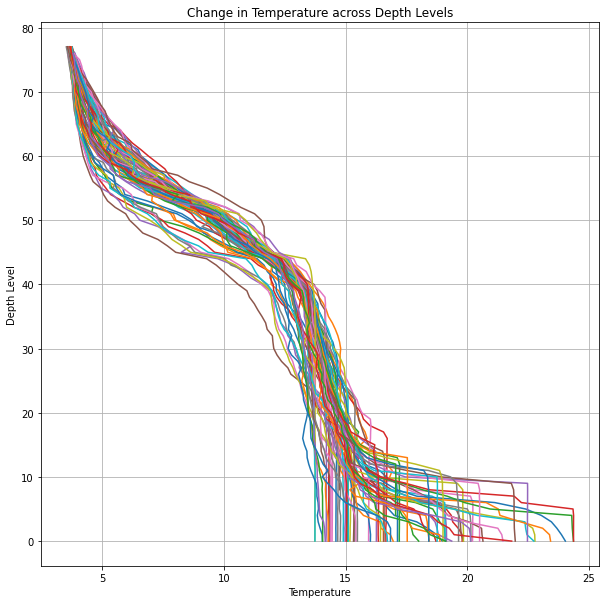

In [223]:
# Temperature plot
fig6 = plt.figure(6, figsize = (10, 10))
plt.grid(True)
plt.plot(T, depth_level)
plt.xlabel("Temperature")
plt.ylabel("Depth Level")
plt.title("Change in Temperature across Depth Levels")

Text(0.5, 1.0, 'Change in Salinity across Depth Levels')

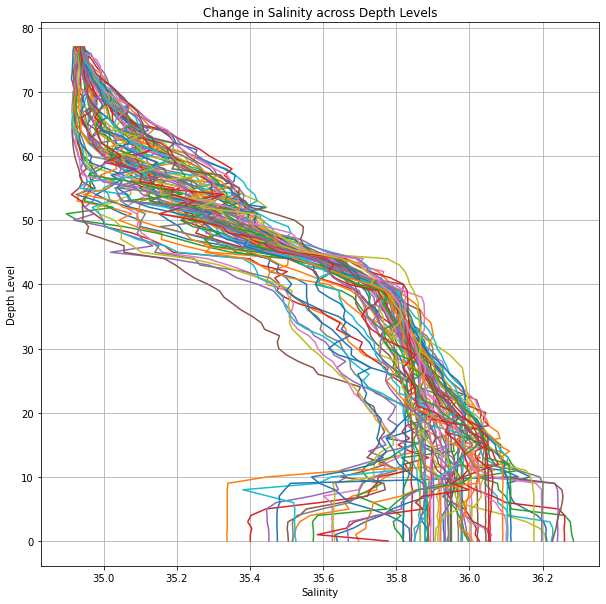

In [222]:
# Salinity Plot
fig7 = plt.figure(7, figsize = (10, 10))
plt.grid(True)
plt.plot(S, depth_level)
plt.xlabel("Salinity")
plt.ylabel("Depth Level")
plt.title("Change in Salinity across Depth Levels")

Text(0.5, 1.0, 'Change in Pressure across Depth Levels')

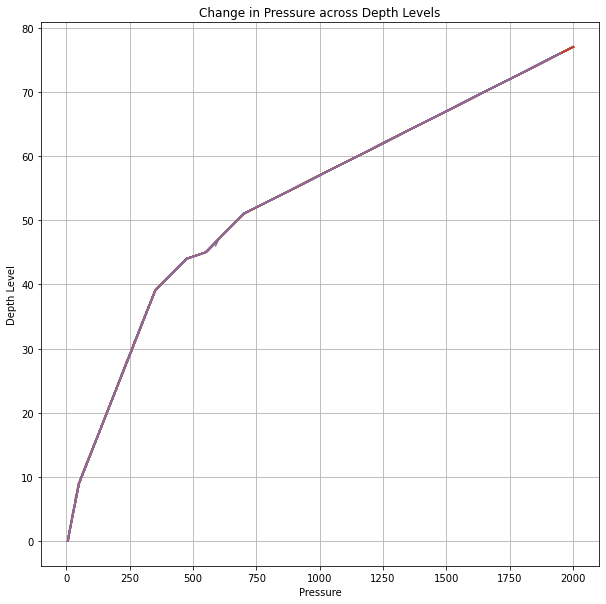

In [221]:
# Pressure Plot
fig8= plt.figure(8, figsize = (10, 10))
plt.grid(True)
plt.plot(P, depth_level)
plt.xlabel("Pressure")
plt.ylabel("Depth Level")
plt.title("Change in Pressure across Depth Levels")

### 2.5 Now make three similar plot, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


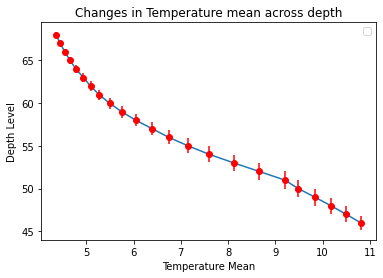

In [203]:
#Temperature Mean
T_mean  = np.mean(T, axis = 1) #axis = 0 means along the column and axis = 1 means working along the row.
T_std = np.std(T, axis = 1)
plt.plot(T_mean, depth_level)
plt.errorbar(T_mean, depth_level, yerr= T_std, fmt="o", color="r")
plt.grid(True)
plt.xlabel("Temperature Mean")
plt.ylabel("Depth Level")
plt.title("Changes in Temperature mean across depth")
plt.show()

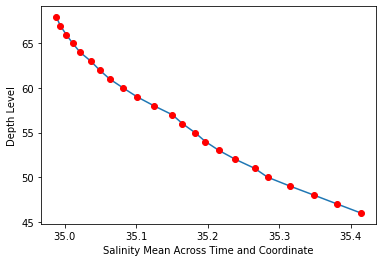

In [200]:
# Salinity
S_mean  = np.mean(S, axis = 1) #axis = 0 means along the column and axis = 1 means working along the row.
S_std = np.std(S, axis = 1)
plt.plot(S_mean, depth_level)
plt.errorbar(S_mean, depth_level, yerr= S_std, fmt="o", color="r")
plt.grid(True)
plt.xlabel("Salinity Mean")
plt.ylabel("Depth Level")
plt.title("Changes in Salinity mean across depth")
plt.show()

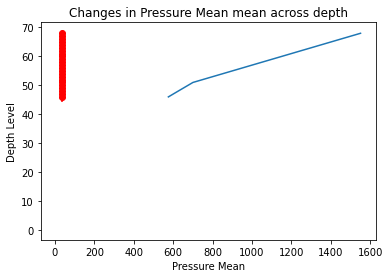

In [206]:
# Pressure Mean
P_mean  = np.mean(P, axis = 1) #axis = 0 means along the column and axis = 1 means working along the row.
P_std = np.std(P, axis = 1)
plt.plot(P_mean, depth_level)
plt.errorbar(S_mean, depth_level, yerr= P_std, fmt="o", color="r")
plt.grid(True)
plt.xlabel("Pressure Mean")
plt.ylabel("Depth Level")
plt.title("Changes in Pressure Mean mean across depth")
plt.show()

### 2.6 Account For Missing Data

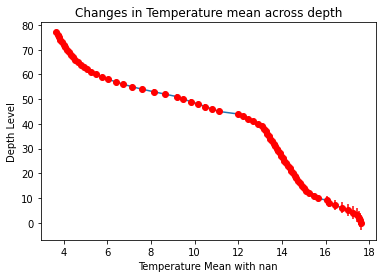

In [208]:
# Temperature mean and std w/o Nan
T_mean_nan  = np.nanmean(T, axis = 1) 
T_std_nan = np.nanstd(T, axis = 1)
plt.plot(T_mean_nan, depth_level)
plt.errorbar(T_mean_nan, depth_level, yerr= T_std_nan, fmt="o", color="r")
plt.grid(True)
plt.xlabel("Temperature Mean without nan")
plt.ylabel("Depth Level")
plt.title("Changes in Temperature mean across depth")
plt.show()

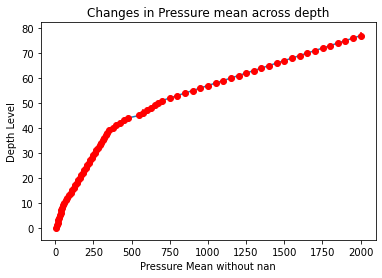

In [210]:
# Pressure mean and std w/o Nan
P_mean_nan  = np.nanmean(P, axis = 1) 
P_std_nan = np.nanstd(P, axis = 1)
plt.plot(P_mean_nan, depth_level)
plt.errorbar(P_mean_nan, depth_level, yerr= P_std_nan, fmt="o", color="r")
plt.grid(True)
plt.xlabel("Pressure Mean without nan")
plt.ylabel("Depth Level")
plt.title("Changes in Pressure mean across depth")
plt.show()


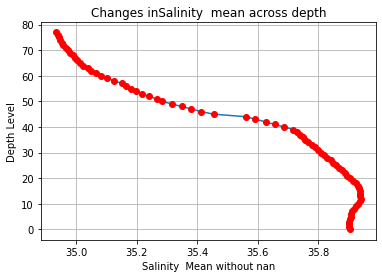

In [220]:
# Salinity mean and std w/o Nan
S_mean_nan  = np.nanmean(S, axis = 1) 
S_std_nan = np.nanstd(S, axis = 1)
plt.plot(S_mean_nan, depth_level)
plt.errorbar(S_mean_nan, depth_level, yerr= S_std_nan, fmt="o", color="r")
plt.grid(True)
plt.xlabel("Salinity  Mean without nan")
plt.ylabel("Depth Level")
plt.title("Changes inSalinity  mean across depth")
plt.show()

### 2.7 Create a scatter plot of the lon, lat positions of the ARGO float.

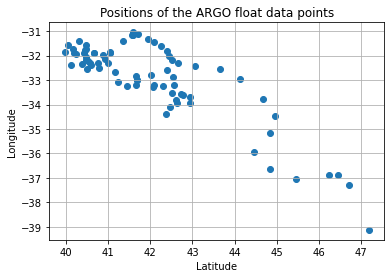

In [225]:
#Create Scatter plot
plt.scatter(lat, lon)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Positions of the ARGO float data points")
plt.show()